In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fetch historical data
aapl = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
msft = yf.download('MSFT', start='2020-01-01', end='2023-01-01')

# Calculate daily returns
aapl['Return'] = aapl['Adj Close'].pct_change()
msft['Return'] = msft['Adj Close'].pct_change()

# Drop NaN values
aapl = aapl.dropna()
msft = msft.dropna()

# Create a DataFrame with returns
data = pd.DataFrame({'AAPL_Return': aapl['Return'], 'MSFT_Return': msft['Return']})
print(data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
            AAPL_Return  MSFT_Return
Date                                
2020-01-03    -0.009722    -0.012451
2020-01-06     0.007968     0.002585
2020-01-07    -0.004703    -0.009118
2020-01-08     0.016086     0.015929
2020-01-09     0.021241     0.012493


In [10]:
data

,AAPL_Return,MSFT_Return
Date,,
2020-01-03,-0.009722,-0.012451
2020-01-06,0.007968,0.002585
2020-01-07,-0.004703,-0.009118
2020-01-08,0.016086,0.015929
2020-01-09,0.021241,0.012493
...,...,...
2022-12-23,-0.002798,0.002267
2022-12-27,-0.013878,-0.007414
2022-12-28,-0.030685,-0.010255


In [11]:
X = data[['AAPL_Return']]
Y = data['MSFT_Return']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# Create linear regression object
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, Y_train)

LinearRegression()

In [13]:
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficient: {regressor.coef_[0]}")

Intercept: 7.34406961905434e-05
Coefficient: 0.7582280892479459


In [14]:
Y_pred = regressor.predict(X_test)
print(f"Predicted values: {Y_pred[:5]}")
print(f"Actual values: {Y_test.values[:5]}")

Predicted values: [-0.01576872 -0.01605356  0.07066524  0.02196319 -0.02969754]
Actual values: [-0.01295678 -0.02928217  0.06653913  0.01825909 -0.02913498]


In [15]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.00011726575264753255
R-squared Score: 0.765721453117927


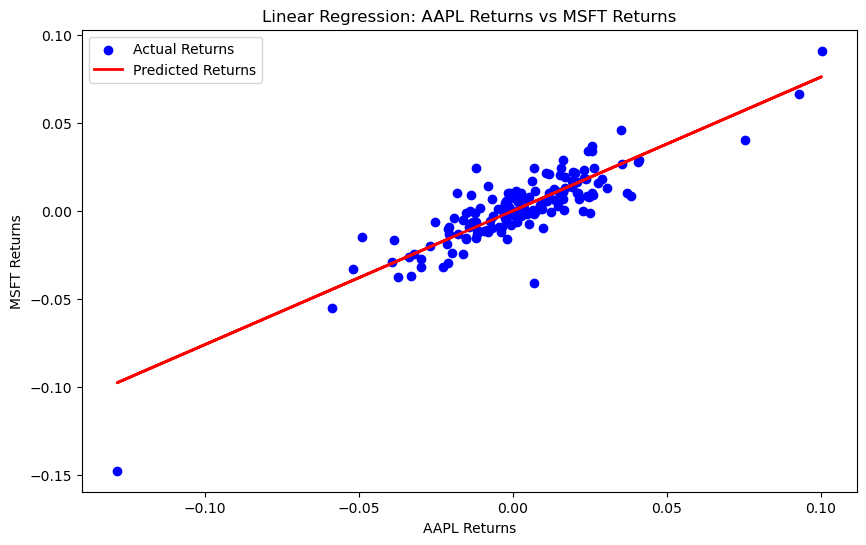

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Returns')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted Returns')
plt.title('Linear Regression: AAPL Returns vs MSFT Returns')
plt.xlabel('AAPL Returns')
plt.ylabel('MSFT Returns')
plt.legend()
plt.show()